In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import StandardScaler

from math import ceil

from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop

%matplotlib inline

In [79]:
train = pd.read_csv('./input/sales_train.csv')
test = pd.read_csv('./input/test.csv')
submission = pd.read_csv('./input/sample_submission.csv')
items = pd.read_csv('./input/items.csv')
item_cats = pd.read_csv('./input/item_categories.csv')
shops = pd.read_csv('./input/shops.csv')

In [80]:
#Filters the data frame on the basis of shops and 
test_shops = test.shop_id.unique()
train = train[train.shop_id.isin(test_shops)]
test_items = test.item_id.unique()
train = train[train.item_id.isin(test_items)]

In [81]:
MAX_BLOCK_NUM = train.date_block_num.max()
print(MAX_BLOCK_NUM)
MAX_ITEM = len(test_items)
MAX_CAT = len(item_cats)
MAX_YEAR = 3
MAX_MONTH = 4 # 7 8 9 10
MAX_SHOP = len(test_shops)

33


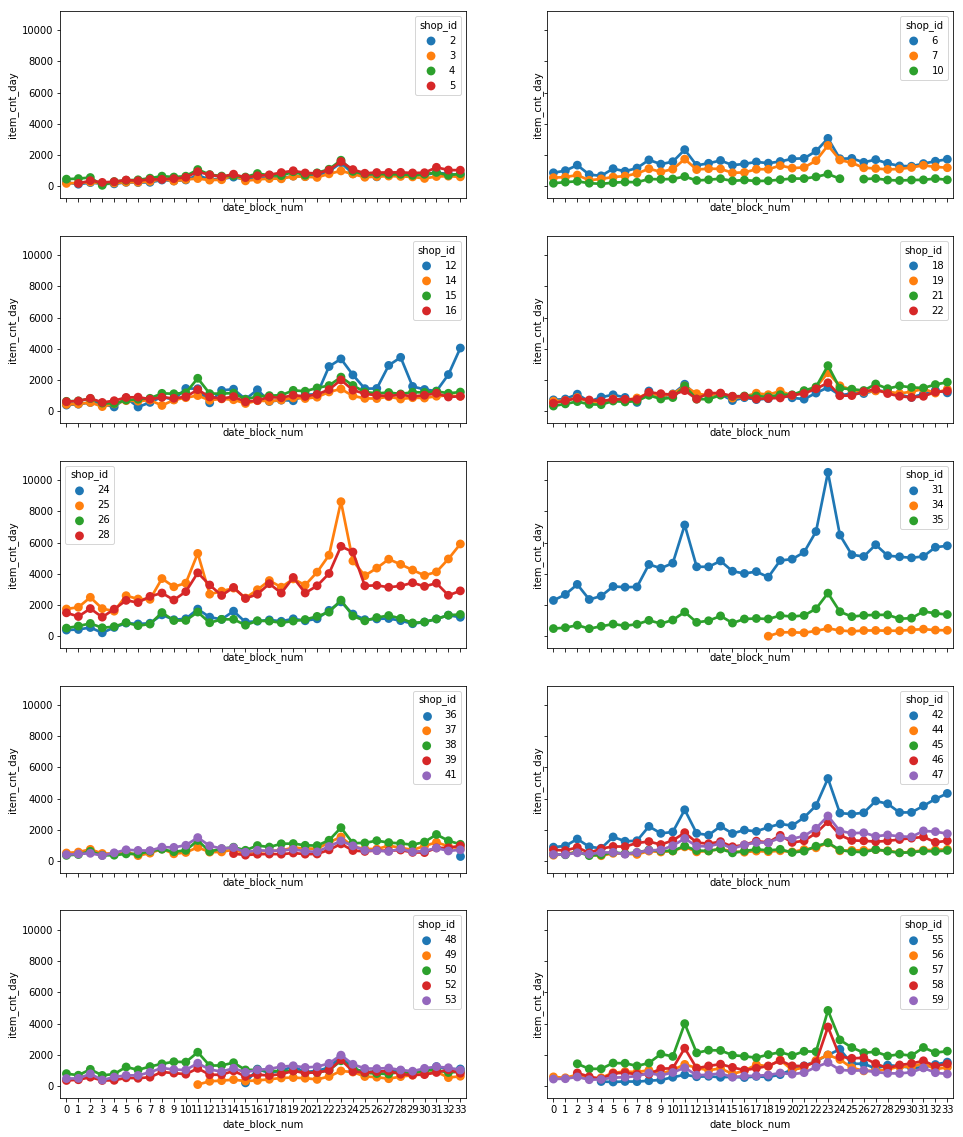

In [82]:
grouped = pd.DataFrame(train.groupby(['shop_id','date_block_num'])['item_cnt_day'].sum().reset_index())
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(grouped.shop_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id', data=grouped[np.logical_and(count*id_per_graph <= grouped['shop_id'], grouped['shop_id'] < (count+1)*id_per_graph)], ax=axes[i][j])
        count += 1


In [83]:
print(train.head())

          date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0   02.01.2013               0       59    22154       999.0           1.0
10  03.01.2013               0       25     2574       399.0           2.0
11  05.01.2013               0       25     2574       399.0           1.0
12  07.01.2013               0       25     2574       399.0           1.0
13  08.01.2013               0       25     2574       399.0           2.0


In [84]:
# add categories
train = train.set_index('item_id').join(items.set_index('item_id')).drop('item_name', axis=1).reset_index()

In [85]:
print(train.head())

   item_id        date  date_block_num  shop_id  item_price  item_cnt_day  \
0       30  28.02.2013               1       50       399.0           1.0   
1       30  26.02.2013               1       50       399.0           1.0   
2       30  12.02.2013               1       50       399.0           1.0   
3       30  14.02.2013               1       50       399.0           2.0   
4       30  15.02.2013               1       50       399.0           3.0   

   item_category_id  
0                40  
1                40  
2                40  
3                40  
4                40  


In [ ]:
train['month'] = train.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y').strftime('%m'))
train['year'] = train.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y').strftime('%Y'))

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(train.item_category_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='month', y='item_cnt_day', hue='item_category_id', 
                      data=train[np.logical_and(count*id_per_graph <= train['item_category_id'], train['item_category_id'] < (count+1)*id_per_graph)], 
                      ax=axes[i][j])
        count += 1
